In [1]:
import tensorflow as tf

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [3]:
import re
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\RSN\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\RSN\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\RSN\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [4]:
df = pd.read_csv('twitter_training.csv')
validation_df = pd.read_csv('twitter_validation.csv')

In [5]:
df.head()

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [6]:
df.columns = ['number','borderlands','sentiment','text']
validation_df.columns = ['number','borderlands','sentiment','text']

In [7]:
df.head()

,number,borderlands,sentiment,text
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [8]:
validation_df.head()

,number,borderlands,sentiment,text
0,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
2,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,4433,Google,Neutral,Now the President is slapping Americans in the...
4,6273,FIFA,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...


In [9]:
df.isna().sum()

number           0
borderlands      0
sentiment        0
text           686
dtype: int64

## Drop the null values Because it was the text document

In [10]:
df = df.dropna()

In [11]:
df.isna().sum()

number         0
borderlands    0
sentiment      0
text           0
dtype: int64

## We know that the text are needed to analyse the sentiment of thedataset

In [12]:
df = df.drop(['number','borderlands'],axis=1)
validation_df = validation_df.drop(['number','borderlands'],axis=1)

In [13]:
df.head()

,sentiment,text
0,Positive,I am coming to the borders and I will kill you...
1,Positive,im getting on borderlands and i will kill you ...
2,Positive,im coming on borderlands and i will murder you...
3,Positive,im getting on borderlands 2 and i will murder ...
4,Positive,im getting into borderlands and i can murder y...


In [14]:
validation_df.head()

,sentiment,text
0,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,Negative,@Microsoft Why do I pay for WORD when it funct...
2,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,Neutral,Now the President is slapping Americans in the...
4,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...


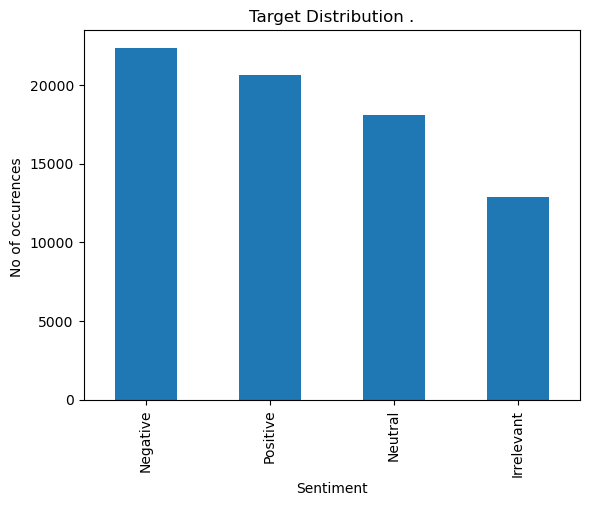

In [15]:
value_counts_target = df['sentiment'].value_counts()
value_counts_target.plot(kind='bar')
plt.xlabel('Sentiment')
plt.ylabel('No of occurences ')
plt.title('Target Distribution .')
plt.show()

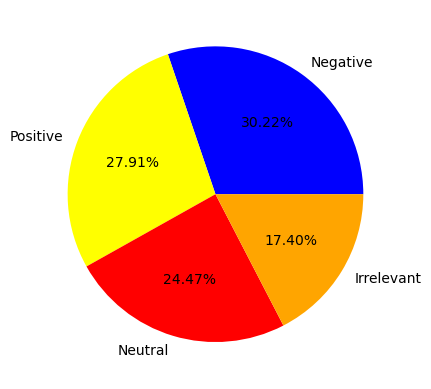

In [16]:
plt.pie(value_counts_target,labels=value_counts_target.index,autopct="%1.2f%%",colors=['blue','yellow','red','orange'])
plt.show()

# NLP Lemmatization 

In [19]:
import re
import nltk
import pandas as pd
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from tqdm import tqdm

# Ensure necessary NLTK data files are downloaded
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
# Function to clean a single text
def clean_text(text):
    wordnet = WordNetLemmatizer()
    sentences = nltk.sent_tokenize(str(text))  # Ensure the input is treated as a string
    corpus = []
    for sentence in sentences:
        review = re.sub('[^a-zA-Z]', ' ', sentence)
        review = review.lower()
        review = review.split()
        review = [wordnet.lemmatize(word) for word in review if word not in set(stopwords.words('english'))]
        review = ' '.join(review)
        corpus.append(review)
    return ' '.join(corpus)
tqdm.pandas()
df['text'] = df['text'].astype(str)  # Ensure all entries in 'text' column are strings
df['text'] = df['text'].progress_apply(lambda x: clean_text(x))

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\RSN\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\RSN\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\RSN\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
100%|██████████| 73995/73995 [04:35<00:00, 268.50it/s]


In [22]:
df

,sentiment,text
0,Positive,coming border kill
1,Positive,im getting borderland kill
2,Positive,im coming borderland murder
3,Positive,im getting borderland murder
4,Positive,im getting borderland murder
...,...,...
74676,Positive,realized window partition mac like year behind...
74677,Positive,realized mac window partition year behind nvid...
74678,Positive,realized window partition mac year behind nvid...
74679,Positive,realized window partition mac like year behind...


In [20]:
texts = df['text'].to_list()

# Bag of Words Implementation 

Tf - IDF vectorizer vectorizes the sentences into words and then assigns a value based on the occurence of words in the texts. The more important/less-frequent the word is higher will be its value. It can help identify those words which actually matter in the sentiment understanding. An can be easily understood by a model

In [21]:
# Creating the TF-IDF model
from sklearn.feature_extraction.text import TfidfVectorizer
cv = TfidfVectorizer()
X = cv.fit_transform(texts).toarray()

In [24]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [25]:
idf_values = cv.idf_
words = cv.get_feature_names_out()

In [28]:
# get idf values
print('\nidf values:')
# Create a DataFrame
idf_df = pd.DataFrame({'words': words, 'idf_values': idf_values})

# Print the DataFrame
idf_df


idf values:


,words,idf_values
0,aa,9.572709
1,aaa,8.685406
2,aaaaaaaaaaaa,11.518619
3,aaaaaaaaaaaaa,10.825472
4,aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa...,11.518619
...,...,...
26650,zzgi,10.420007
26651,zzmhpax,10.265856
26652,zzp,10.420007
26653,zzvfsrhewg,10.602328


In [29]:
# Sort the DataFrame by 'idf_values'
idf_df_sorted = idf_df.sort_values(by='idf_values', ascending=False)
idf_df_sorted

,words,idf_values
26654,zzz,11.518619
6070,distracts,11.518619
22655,tchretchretchttv,11.518619
6251,dooed,11.518619
22656,tchretchretweets,11.518619
...,...,...
23889,twitter,3.875136
17133,pic,3.856857
13255,like,3.786469
8828,game,3.056622


In [32]:
required = pd.DataFrame(X,columns = words)
required

,aa,aaa,aaaaaaaaaaaa,aaaaaaaaaaaaa,aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa,aaaaaaaaaaages,aaaaaaaaaages,aaaaaasee,aaaahhh,aac,...,zyot,zysola,zywz,zz,zzbk,zzgi,zzmhpax,zzp,zzvfsrhewg,zzz
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73990,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
73991,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
73992,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
73993,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [33]:
merged_df = pd.concat([df, required], axis=1)

In [34]:
merged_df.head()

,sentiment,text,aa,aaa,aaaaaaaaaaaa,aaaaaaaaaaaaa,aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa,aaaaaaaaaaages,aaaaaaaaaages,aaaaaasee,...,zyot,zysola,zywz,zz,zzbk,zzgi,zzmhpax,zzp,zzvfsrhewg,zzz
0,Positive,coming border kill,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Positive,im getting borderland kill,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Positive,im coming borderland murder,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Positive,im getting borderland murder,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Positive,im getting borderland murder,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
